In [1]:
from keras.datasets import imdb

2022-07-03 01:35:37.501467: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()

In [7]:
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')

In [11]:
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-07-03 01:35:47.699730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-03 01:35:58.710736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38448 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


In [16]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [18]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20


2022-07-03 02:24:35.672882: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


30/30 [==============================] - 15s 35ms/step - loss: 0.5756 - accuracy: 0.7433 - val_loss: 0.4646 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3660 - accuracy: 0.8951 - val_loss: 0.3509 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2528 - accuracy: 0.9245 - val_loss: 0.2850 - val_accuracy: 0.8926
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1933 - accuracy: 0.9383 - val_loss: 0.2735 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1551 - accuracy: 0.9506 - val_loss: 0.2929 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1250 - accuracy: 0.9623 - val_loss: 0.3559 - val_accuracy: 0.8645
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1028 - accuracy: 0.9689 - val_loss: 0.3047 - val_accuracy: 0.8855
Epoch 8/20
30/30 [=====

In [20]:
 history_dict = history.history


In [21]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
import matplotlib.pyplot as plt

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [25]:
epochs = range(1, len(loss_values) + 1)

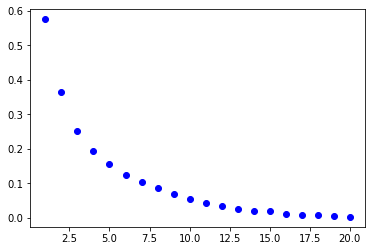

In [27]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')

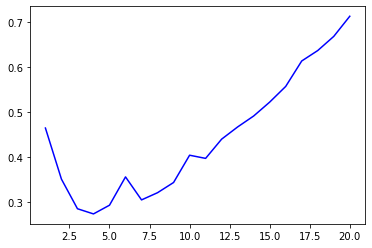

In [28]:
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

Text(0.5, 1.0, 'Training and validation loss')

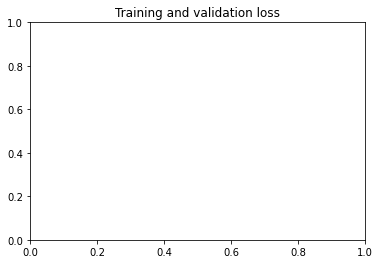

In [29]:
plt.title('Training and validation loss')

Text(0.5, 0, 'Epochs')

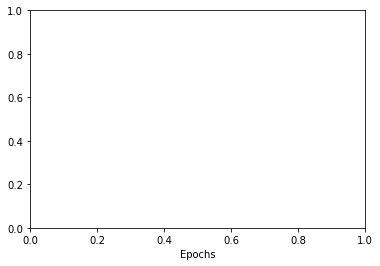

In [30]:
plt.xlabel('Epochs')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


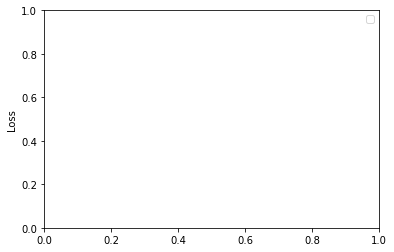

In [31]:
plt.ylabel('Loss')
plt.legend()

In [32]:
plt.show()

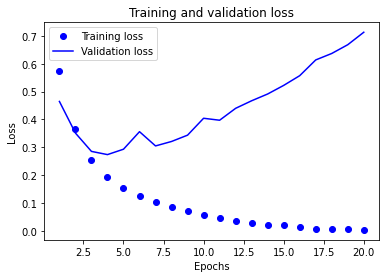

In [33]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

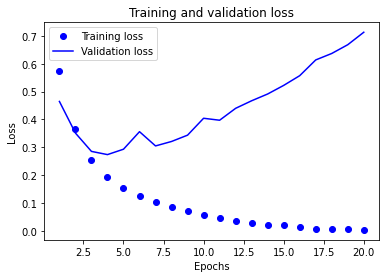

In [34]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Text(0, 0.5, 'Loss')

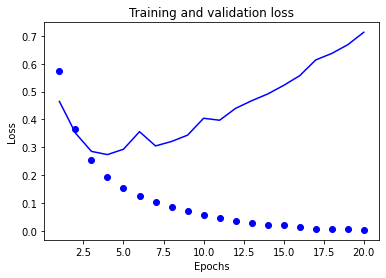

In [35]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


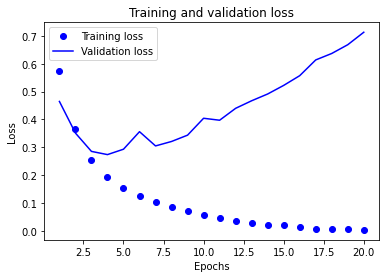

In [36]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'acc'

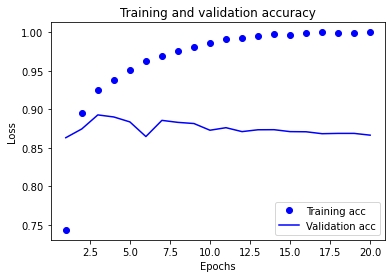

In [39]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4532 - accuracy: 0.8180
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2598 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1977 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3011 - accuracy: 0.8810


In [41]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.20540689],
       [0.99979264],
       [0.96185535],
       ...,
       [0.12500513],
       [0.09632017],
       [0.7352261 ]], dtype=float32)

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [45]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [46]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5790 - accuracy: 0.7426 - val_loss: 0.4495 - val_accuracy: 0.8438
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3536 - accuracy: 0.8953 - val_loss: 0.3266 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2456 - accuracy: 0.9222 - val_loss: 0.2914 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1836 - accuracy: 0.9429 - val_loss: 0.3062 - val_accuracy: 0.8756
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1446 - accuracy: 0.9559 - val_loss: 0.2883 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1163 - accuracy: 0.9641 - val_loss: 0.3567 - val_accuracy: 0.8665
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0963 - accuracy: 0.9714 - val_loss: 0.3430 - val_accuracy: 0.8808
Epoch 8/20
30

In [63]:
def graph_acc(history):
    acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

def graph_loss(history):
    loss_values = history['loss']
    val_loss_values = history['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

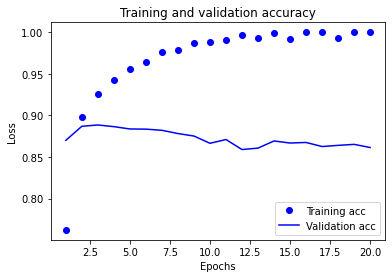

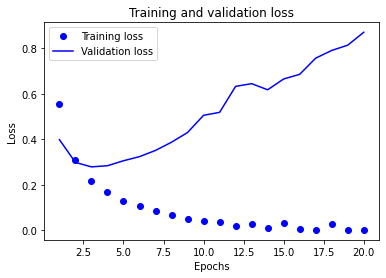

In [58]:
graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.6533 - accuracy: 0.6195 - val_loss: 0.6067 - val_accuracy: 0.7475
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5662 - accuracy: 0.7639 - val_loss: 0.5583 - val_accuracy: 0.7276
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5123 - accuracy: 0.8217 - val_loss: 0.5227 - val_accuracy: 0.7826
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4737 - accuracy: 0.8609 - val_loss: 0.4982 - val_accuracy: 0.8177
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4430 - accuracy: 0.8884 - val_loss: 0.4758 - val_accuracy: 0.8693
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4184 - accuracy: 0.9097 - val_loss: 0.4686 - val_accuracy: 0.8508
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3971 - accuracy: 0.9252 - val_loss: 0.4529 - val_accuracy: 0.8829
Epoch 8/20
30

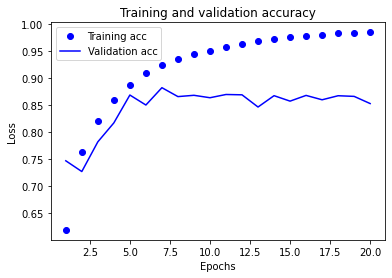

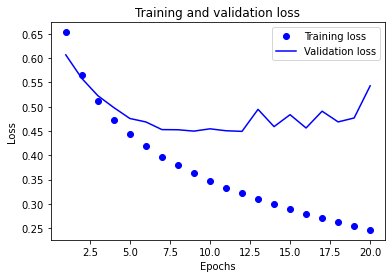

In [61]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5275 - accuracy: 0.7738 - val_loss: 0.3864 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2961 - accuracy: 0.9058 - val_loss: 0.3760 - val_accuracy: 0.8398
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2112 - accuracy: 0.9294 - val_loss: 0.2789 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1696 - accuracy: 0.9419 - val_loss: 0.2786 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1325 - accuracy: 0.9565 - val_loss: 0.2992 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1057 - accuracy: 0.9677 - val_loss: 0.3481 - val_accuracy: 0.8736
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0895 - accuracy: 0.9717 - val_loss: 0.3344 - val_accuracy: 0.8841
Epoch 8/20
30

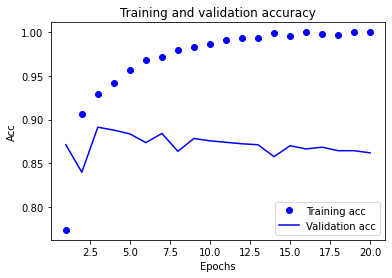

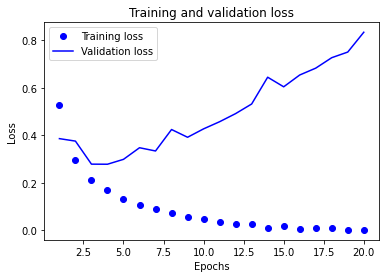

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1843 - accuracy: 0.7737 - val_loss: 0.1305 - val_accuracy: 0.8465
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0950 - accuracy: 0.8973 - val_loss: 0.0941 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0647 - accuracy: 0.9279 - val_loss: 0.0844 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0478 - accuracy: 0.9473 - val_loss: 0.1008 - val_accuracy: 0.8633
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.9605 - val_loss: 0.0854 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0307 - accuracy: 0.9689 - val_loss: 0.0852 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 0.9772 - val_loss: 0.0939 - val_accuracy: 0.8747
Epoch 8/20
30

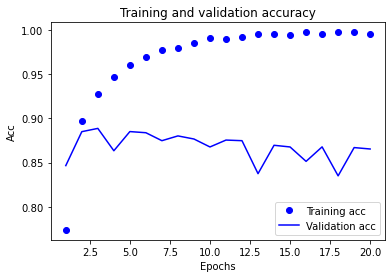

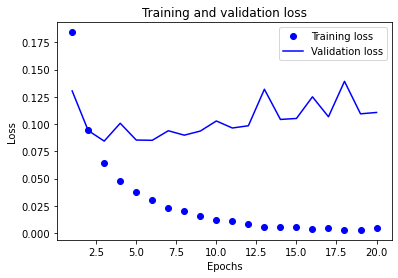

In [65]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.4787 - accuracy: 0.7974 - val_loss: 0.3397 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2517 - accuracy: 0.9101 - val_loss: 0.3033 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1743 - accuracy: 0.9372 - val_loss: 0.2817 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.3118 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0977 - accuracy: 0.9675 - val_loss: 0.3999 - val_accuracy: 0.8694
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0859 - accuracy: 0.9699 - val_loss: 0.4833 - val_accuracy: 0.8562
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.4332 - val_accuracy: 0.8681
Epoch 8/20
30

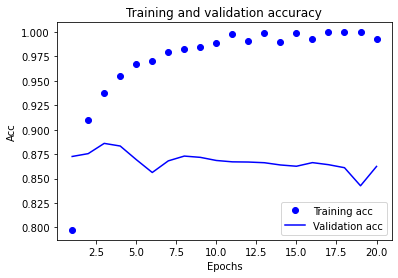

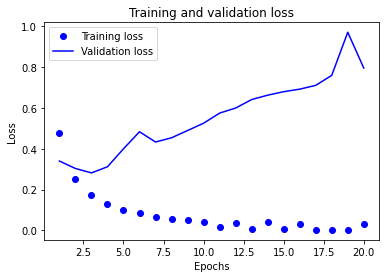

In [66]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

graph_acc(history.history)
graph_loss(history.history)